# 실습 해답

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine, load_iris, load_breast_cancer

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

## Train_Test_Split

In [ ]:
# /02DataPreprocess/00Train_Test_Split
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data.data
y = data.target

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_train.shape, x_test.shape

((398, 30), (171, 30))

## data scaling

In [ ]:
#/02DataPreprocess/01ScalingData.ipynb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data = load_wine()
x = data.data
y = data.target

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
#x_scaled = scaler.fit_trasform(x)

x_scaled

## outlier

In [ ]:
# /02DataPreprocess/02Outlier.ipynb

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/tips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
def idx_of_outliers(x):
    q1, q3 = np.percentile(x, [25,75])
    IQR = q3 - q1
    lower_bound = q1 - [IQR * 1.5]
    upper_bound = q3 + [IQR * 1.5]
    return np.where((x > upper_bound) | (x < lower_bound))

idx_of_outliers(df.tip.values)

(array([ 23,  47,  59, 141, 170, 183, 212, 214, 239], dtype=int64),)

## Discretize

In [ ]:
# 02DataPreprocess/03Discretize.ipynb

titanic = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
pd.cut(titanic.Age, 3)

0        (0.34, 26.947]
1      (26.947, 53.473]
2        (0.34, 26.947]
3      (26.947, 53.473]
4      (26.947, 53.473]
             ...       
886    (26.947, 53.473]
887      (0.34, 26.947]
888                 NaN
889      (0.34, 26.947]
890    (26.947, 53.473]
Name: Age, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

## one-hot encoding

In [ ]:
# /02DataPreprocess/04Categorical.ipynb
titanic = pd.get_dummies(titanic, columns=['Embarked'], dtype=int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


## 결측치 대체

In [ ]:
# /02DataPreprocess/05MissingValue.ipynb
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/titanic.csv')

In [ ]:
titanic.head()
print(titanic.Age.isnull().sum()) # 결측치 개수

177


In [ ]:
titanic.Age = titanic.Age.fillna(titanic.Age.mean()) # 결측치 대체

## 파이프라인

In [ ]:
# 02DataPreprocess/07Pipeline.ipynb
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler())
])

In [ ]:
num_pipeline.fit_transform(titanic[['Age']])

array([[-0.56573646],
       [ 0.66386103],
       [-0.25833709],
       [ 0.4333115 ],
       [ 0.4333115 ],
       [-0.1046374 ],
       [ 1.89345853],
       [-2.10273333],
       [-0.18148724],
       [-1.18053521],
       [-1.94903364],
       [ 2.2008579 ],
       [-0.71943615],
       [ 0.74071088],
       [-1.18053521],
       [ 1.97030837],
       [-2.10273333],
       [-0.1046374 ],
       [ 0.12591213],
       [-0.1046374 ],
       [ 0.4333115 ],
       [ 0.35646166],
       [-1.10368536],
       [-0.1046374 ],
       [-1.64163427],
       [ 0.66386103],
       [-0.1046374 ],
       [-0.79628599],
       [-0.1046374 ],
       [-0.1046374 ],
       [ 0.81756072],
       [-0.1046374 ],
       [-0.1046374 ],
       [ 2.81565665],
       [-0.1046374 ],
       [ 0.97126041],
       [-0.1046374 ],
       [-0.6425863 ],
       [-0.87313583],
       [-1.18053521],
       [ 0.81756072],
       [-0.18148724],
       [-0.1046374 ],
       [-2.02588348],
       [-0.79628599],
       [-0

## MultipleLinearRegression

In [ ]:
# 03Supervised/01Regression/02MultipleLinearRegression.ipynb
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/housing.data.txt')
x = data.values[:,:-1]
y = data.values[:,-1]

In [ ]:
model = LinearRegression()
model.fit(x, y)
model.score(x, y)

0.7406426641094095

In [ ]:
print(model.coef_,model.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.45948838508998


## 01Regression - 03Standardization

In [ ]:
# 03Supervised/01Regression/03Standardization.ipynb

import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/housing.data.txt')
x = data.values[:,:-1]
y = data.values[:,-1]

In [ ]:
pd.Series(data.columns[:-1])
pd.Series(model.coef_)
pd.concat([pd.Series(data.columns[:-1]), pd.Series(model.coef_)], axis=1)

,0,1
0,CRIM,-0.928146
1,ZN,1.081569
2,INDUS,0.140900
3,CHAS,0.681740
4,NOX,-2.056718
5,RM,2.674230
6,AGE,0.019466
7,DIS,-3.104044
8,RAD,2.662218
9,TAX,-2.076782


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
model = LinearRegression()
model.fit(x_scaled, y)
model.score(x_scaled, y)

0.7406426641094095

In [ ]:
print(model.coef_,model.intercept_)

[-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713] 22.532806324110677


## LogisticRegression - 02ConfusionMatrix

In [ ]:
# 02LogisticRegression/02ConfusionMatrix.ipynb

data = load_wine()
x = data.data
y = data.target

In [ ]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(x,y)
model.score(x,y)

0.9719101123595506

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score

y_pred = model.predict(x)
print(confusion_matrix(y, y_pred))

[[57  2  0]
 [ 0 69  2]
 [ 0  1 47]]


In [ ]:
accuracy_score(y, y_pred)

0.9719101123595506

In [ ]:
precision_score(y_true=y, y_pred=y_pred, average=None) #각 class별로

array([1.        , 0.95833333, 0.95918367])

In [ ]:
precision_score(y_true=y, y_pred=y_pred, average='macro') # 각 class별 단순산술평균

0.9725056689342404

In [ ]:
precision_score(y_true=y, y_pred=y_pred, average='micro') # 각 class별 전체(total) TP, FP로 계산

0.9719101123595506

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.96      0.97      0.97        71
           2       0.96      0.98      0.97        48

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



## Kernel SVM

In [ ]:
# /03Supervised/03SVM/02Kernel_SVM.ipynb
data = load_wine()
x = data.data
y = data.target

In [ ]:
from sklearn.svm import SVC

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

model = SVC(kernel='rbf', gamma= 0.1)
model.fit(x_scaled,y)
model.score(x_scaled,y)

1.0

In [ ]:
# /03Supervised/03SVM/03SVM_reg.ipynb

import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/housing.data.txt')
x = data.values[:,:-1]
y = data.values[:,-1]

In [ ]:
from sklearn.svm import SVR

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
model = SVR(kernel='rbf')
model.fit(x_scaled, y)
model.score(x_scaled,y)

0.7028285706092579

## DecisionTree

In [ ]:
# /04DecisionTree_RandomForest/01DecisionTree.ipynb
from sklearn.tree import DecisionTreeClassifier

data = load_wine()
x = data.data
y = data.target

model = DecisionTreeClassifier(max_depth=4)
model.fit(x, y)
print(model.score(x, y))

print(model.feature_importances_)

0.9887640449438202
[0.02735397 0.         0.         0.         0.         0.
 0.17054128 0.         0.         0.03366801 0.05940172 0.31856726
 0.39046776]


## RandomForest

In [ ]:
# /04DecisionTree_RandomForest/03RandomForest.ipynb

from sklearn.ensemble import RandomForestClassifier

data = load_wine()
x = data.data
y = data.target

model = RandomForestClassifier()
model.fit(x, y)
print(model.score(x, y))

print(model.feature_importances_)

1.0
[0.13425503 0.03633208 0.01131785 0.02339869 0.02969351 0.04933349
 0.16883341 0.01697358 0.02146141 0.15817797 0.05231691 0.10774803
 0.19015803]


## NaiveBayes

In [ ]:
#/03Supervised/05NaiveBayes/NaiveBayes.ipynb
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

model.fit(x, y)
model.score(x, y)

0.9887640449438202

## KNN

In [ ]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                    test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) #모형의 생성
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9814814814814815

## KFoldCrossValidation

In [ ]:
#/04Evaluation_Selection/02KFoldCrossValidation.ipynb

from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

digits = datasets.load_digits()
features = digits.data
target = digits.target

In [ ]:
model = LogisticRegression(solver='liblinear')

scores = cross_val_score(estimator=model,  # 파이프라인 또는 모형
                         X=features,  # 특성값
                         y=target,  # 타겟값
                         cv=10,   # 10-Fold Cross validation
                         )

print('CV 정확도: %.3f' % np.mean(scores))

CV 정확도: 0.926


# ValidationCurve

In [ ]:
# 03LearningValidationCurve.ipynb

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
                estimator=model,
                X=X,
                y=y,
                param_name='max_depth',
                param_range=param_range,
                cv=10)

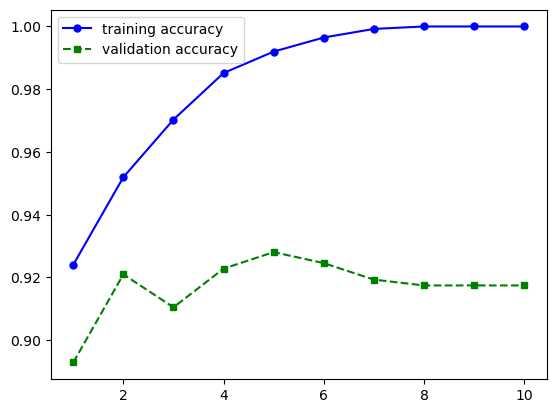

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.legend()

## ModelSelecion

In [ ]:
# /04Evaluation_Selection/04ModelSelecion.ipynb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

data = load_wine()
x = data.data
y = data.target

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
best_model = clf.fit(x, y)
best_model.best_estimator_.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Imbalanced Class

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/InsuranceData.csv')

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.get_dummies(data, ['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

X = data.drop(columns= ['id', 'Response']) #Columns to be excluded from training set
y = data['Response'] #defining the Response as y

X.columns = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Age_1_2_Year', 'Vehicle_Age_lessthan_1_Year',
       'Vehicle_Age_greaterthan_2_Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_balanced = DecisionTreeClassifier(random_state=0, class_weight='balanced')
tree_balanced.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [ ]:
pred_balanced = tree_balanced.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy of Test Set:", round(accuracy_score(y_test, pred_balanced) * 100, 2 ), "%")

precision_balanced =  round(precision_score(y_test, pred_balanced), 4)
recall_balanced = round(recall_score(y_test, pred_balanced), 4)
F1_balanced =  round(f1_score(y_test, pred_balanced), 4)

print('Precision = ', precision_balanced)
print('Recall = ', recall_balanced)
print('F1_score = ', F1_balanced)

Accuracy of Test Set: 94.83 %
Precision =  0.8454
Recall =  0.8391
F1_score =  0.8422


## PCA

In [ ]:
# /05Unsupervised/01DimesionReduction/PCA.ipynb
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

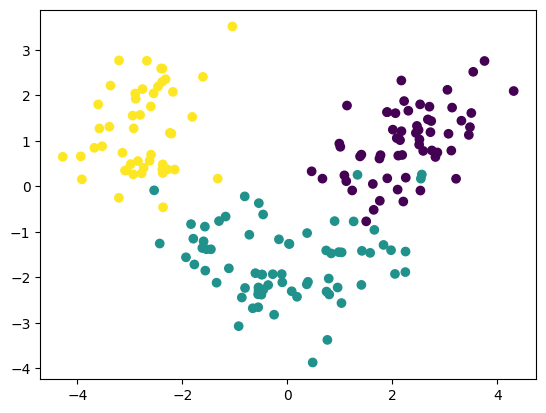

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

x_pca = pca.transform(X_scaled)

import matplotlib.pyplot as plt

plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.show()

## t_SNE

In [ ]:
#/05Unsupervised/01DimesionReduction/t_SNE.ipynb
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

In [ ]:
import matplotlib.pyplot as plt

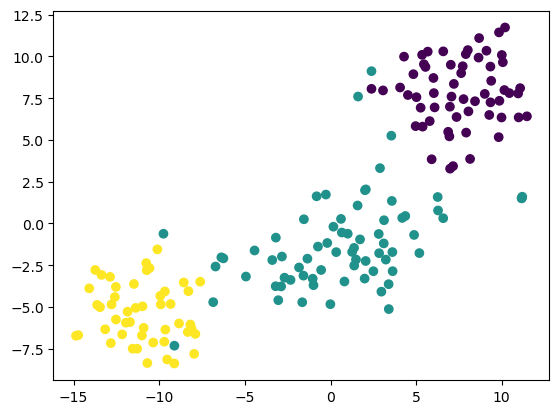

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,  random_state=1)

x_tsne = tsne.fit_transform(X_scaled)

plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
plt.show()

# K-means
해당 예제에 데이터 스케일링 부분이 누락되어 있다. iris 데이터 셋의 데이터 스케일을 조정(StandardScaler/MinMaxScaler)하여 군집을 실행 해 보시오.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data[:, :2]


In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# k-means
model = KMeans(n_clusters=2)
model.fit(X_scaled)

KMeans(n_clusters=2)

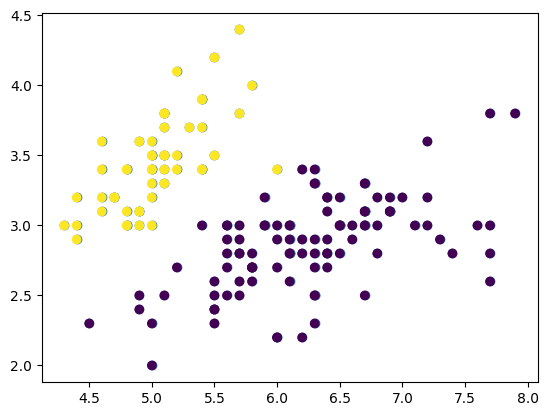

In [ ]:
# 군집결과 시각화
plt.scatter(X[:, 0], X[:, 1], )
plt.scatter(X[:, 0], X[:, 1], c=model.labels_ )
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X_scaled, model.labels_)

np.float64(0.44787107939629056)

#  Hierarchical Clustering
1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```
2. 읽어들인 데이터에 대해서 스케일링을 수행하시오.
3.  Hierarchical Clustering을 수행하고 결과를 확인하시오.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X_scaled)
labels = agg_clustering.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# DBSCAN

1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```
2. 읽어들인 데이터에 대해서 스케일링을 수행하시오.
3.  Hierarchical Clustering을 수행하고 결과를 확인하시오.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=2.0, min_samples=5)
labels = model.fit_predict(X_scaled)

print(labels)

[ 0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0  1 -1  1  1  1  1  1 -1 -1 -1
 -1  0 -1 -1 -1  0  0  0  0 -1  0  1  0 -1 -1  0 -1  1  0 -1  0  0 -1 -1
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  2  2  2 -1 -1 -1 -1 -1  3  3 -1  3 -1
 -1 -1 -1  4  4 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  4  3  3  2  4 -1 -1  4
 -1 -1  2  4  4 -1  4 -1 -1 -1]
